GANS in MNIST FASHION DATASET

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, LeakyReLU, BatchNormalization, Reshape, Flatten, Input
from tensorflow.keras.optimizers import Adam

In [ ]:
# Load Fashion MNIST dataset
(x_train, _), (_,_) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# Normalize the Image
x_train = x_train / 127.5-1.0
x_train = np.expand_dims(x_train, axis = 3)


In [ ]:
# Define Dimensions of the noise vector
latent_dim = 100

In [ ]:
# Generator Model
generator = Sequential([
    Dense(128 * 7 * 7, input_dim = latent_dim),
    LeakyReLU(0.2),
    Reshape((7,7,128)),
    BatchNormalization(),
    Flatten(),
    Dense(128 * 7 * 7),
    LeakyReLU(0.2),
    Reshape((7,7,128)),
    BatchNormalization(),
    Flatten(),
    Dense(28*28, activation = 'tanh'),
    Reshape((28,28,1))
])

In [ ]:
# Discriminator Model
discriminator = Sequential([
    Flatten(input_shape=(28,28,1)),
    Dense(128),
    LeakyReLU(0.2),
    Dense(1,activation = 'sigmoid')
])

In [ ]:
# Compile the discriminator
discriminator.compile(loss = 'binary_crossentropy',
                      optimizer = Adam(lr = 0.0002, beta_1 = 0.5),
                      metrics = ['accuracy'])

In [ ]:
# Combine the generator and discriminator into a single model
discriminator.trainable = False
gan_input = Input(shape=(latent_dim,))
generated_image = generator(gan_input)
gan_output = discriminator(generated_image)
gan = Model(gan_input, gan_output)
gan.compile(loss="binary_crossentropy",
            optimizer = Adam(lr=0.0002, beta_1 = 0.5))

In [ ]:
# Training the GAN

epochs = 1000
batch_size = 128

for epoch in range(epochs):
  # Train the Discriminator
  idx = np.random.randint(0, x_train.shape[0], batch_size)
  real_images = x_train[idx]
  noise = np.random.normal(0,1,(batch_size, latent_dim))
  fake_images = generator.predict(noise)
  real_labels = np.ones((batch_size, 1))
  fake_labels = np.zeros((batch_size, 1))
  d_loss_real = discriminator.train_on_batch(real_images, real_labels)
  d_loss_fake = discriminator.train_on_batch(fake_images, fake_labels)
  d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

  # Train generator
  noise = np.random.normal(0,1, (batch_size, latent_dim))
  fake_labels = np.ones((batch_size, 1))
  g_loss = gan.train_on_batch

  # Print Progress
  if epoch % 100 == 0:
    print(f'Epoch {epoch}/{epochs} | Discriminator Loss: {d_loss[0]} | Generator Loss: {g_loss}')

4/4 [==============================] - 0s 75ms/step
Epoch 0/1000 | Discriminator Loss: 0.003995412909716833 | Generator Loss: <bound method Model.train_on_batch of <keras.src.engine.functional.Functional object at 0x7a2632ee58d0>>
4/4 [==============================] - 0s 84ms/step
Epoch 100/1000 | Discriminator Loss: 0.0004391134061734192 | Generator Loss: <bound method Model.train_on_batch of <keras.src.engine.functional.Functional object at 0x7a2632ee58d0>>
4/4 [==============================] - 0s 76ms/step
Epoch 200/1000 | Discriminator Loss: 0.0010847130470210686 | Generator Loss: <bound method Model.train_on_batch of <keras.src.engine.functional.Functional object at 0x7a2632ee58d0>>
4/4 [==============================] - 0s 75ms/step
Epoch 300/1000 | Discriminator Loss: 6.704991619699285e-05 | Generator Loss: <bound method Model.train_on_batch of <keras.src.engine.functional.Functional object at 0x7a2632ee58d0>>
4/4 [==============================] - 1s 126ms/step
Epoch 400/1000

1/1 [==============================] - 0s 179ms/step


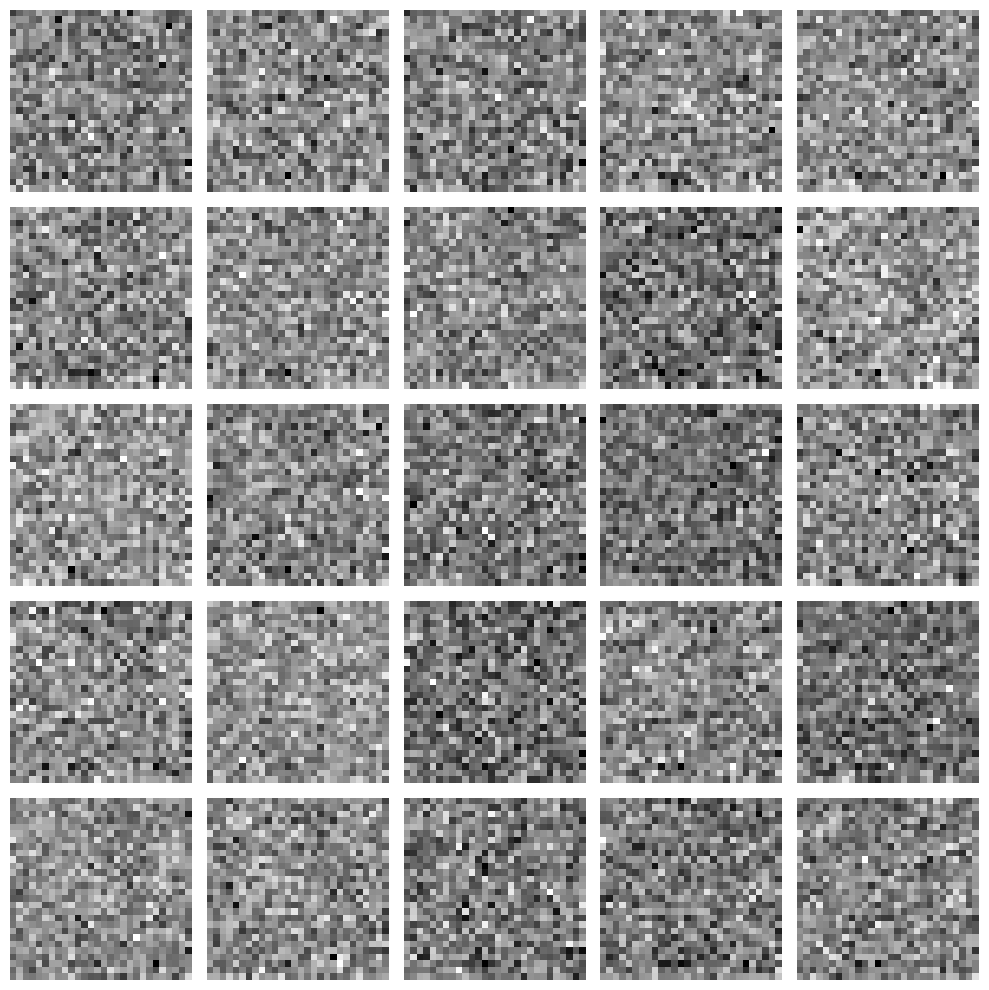

In [ ]:
# Generate images
rows, cols = 5, 5
noise = np.random.normal(0, 1, (rows * cols, latent_dim))
generated_images = generator.predict(noise)

# Plot generated images
plt.figure(figsize=(10, 10))
for i in range(rows * cols):
    plt.subplot(rows, cols, i + 1)
    plt.imshow((generated_images[i].reshape(28, 28) + 1) / 2, cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()
